In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plot_text as pt
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#display all columns
pd.set_option('display.max_columns', None)

#display all row
pd.set_option('display.max_rows', None)

In [2]:
df_ecom = pd.read_csv(r'D:\Dataset\Final_project\dataset.csv')

In [3]:
df_ecom.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [4]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12835 non-null  float64
 1   Administrative_Duration  12313 non-null  float64
 2   Informational            12946 non-null  int64  
 3   Informational_Duration   12946 non-null  float64
 4   ProductRelated           12946 non-null  int64  
 5   ProductRelated_Duration  12307 non-null  float64
 6   BounceRates              12872 non-null  float64
 7   ExitRates                12946 non-null  float64
 8   PageValues               12946 non-null  float64
 9   SpecialDay               12946 non-null  float64
 10  Month                    12946 non-null  object 
 11  OperatingSystems         12422 non-null  float64
 12  Browser                  12946 non-null  int64  
 13  Region                   12946 non-null  int64  
 14  TrafficType           

In [5]:
df_ecom.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12835.0,2.303857,3.314427,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12313.0,80.370267,175.494016,0.0,0.000000,7.000000,92.933333,3398.750000
Informational,12946.0,0.498841,1.263276,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12946.0,34.136048,140.022848,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12946.0,31.657655,44.202635,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12307.0,1192.740077,1910.216261,0.0,182.083333,599.583333,1470.522917,63973.522230
BounceRates,12872.0,0.022309,0.048681,0.0,0.000000,0.003112,0.016933,0.200000
ExitRates,12946.0,0.043266,0.048808,0.0,0.014286,0.025329,0.050000,0.200000
PageValues,12946.0,5.875963,18.414670,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12946.0,0.061270,0.198667,0.0,0.000000,0.000000,0.000000,1.000000


#### Notes:
-  Column ProductRelated_Duration has a very high max value compared to it's 75% quartile, with the max values reaching more than 63,000 seconds or more than 17,5 hours. This could be considered an extremely unusual behavior considering the average and the 75% quartile values is in the range of 33 minutes to 40 mintues.

# Data Cleaning

## Missing Values

In [6]:
df_ecom.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [7]:
miscol_temp = pd.DataFrame(columns=['Columns','Num'])

In [8]:
for col in df_ecom.columns:
    col_misval = df_ecom[col].isna().sum()
    if col_misval > 0:
        miscol_temp.loc[len(miscol_temp)] = [col, col_misval]
        
miscol_temp

,Columns,Num
0,Administrative,111
1,Administrative_Duration,633
2,ProductRelated_Duration,639
3,BounceRates,74
4,OperatingSystems,524


#### There are a total of 5 columns with missing value
- Administrative
- Administrative_Duration
- ProductRelated_Duration
- BounceRates
- OperatingSystems

## Duplicate rows

In [9]:
df_ecom.duplicated().sum()

711

#### There are a total of 711 duplicate rows
- A row is flagged as a duplicate when all its values across all columns match the values of another row or rows in the DataFrame.
- Duplicate rows are typically dropped upon discovery since they contains the same values with other rows and might cause bias.

In [10]:
df_ecom = df_ecom.drop_duplicates()

In [11]:
df_ecom.duplicated().sum()

0

## Handling missing values

In [12]:
# the missing values in columns 'Administrative','Administrative_Duration','ProductRelated_Duration' is replaced by 0.
# the assumptions is visitor did not visit administrative page, thus result in 0 seconds spent on the page.
# and the visitor did not spent time browsing through product related page thus result in 0 seconds spent on the page.
for col in ['Administrative','Administrative_Duration','ProductRelated_Duration']:
    df_ecom[col] = df_ecom[col].fillna(0)

In [13]:
# the column BounceRates is replaced by it's average values
# this is done because the mean and std doesn't have much difference in values.
# which could also mean lack of outliers
df_ecom['BounceRates'] = df_ecom['BounceRates'].fillna(df_ecom['BounceRates'].mean())

# the column OperatingSystems is replaced by it's most frequent value
df_ecom['OperatingSystems'] = df_ecom['OperatingSystems'].fillna(df_ecom['OperatingSystems'].mode().loc[0])

In [14]:
df_ecom.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Drop unnecessary columns

In [15]:
unn_col = ['OperatingSystems', 'Browser']
for col in unn_col:
    df_ecom.drop(columns=col, axis=1, inplace=True)

#### Notes:
- Column 'OperatingSystems' described as the operating system used by the visitor.
- Column 'Browser' described as the web browser used by the visitor

In [16]:
df_ecom.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,9,3,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,1,4,Returning_Visitor,True,False


In [17]:
df_ecom.shape

(12235, 16)

# Exploratory Data Analysis (EDA)

In [18]:
df_ecom2 = df_ecom.copy()

## Univariate Analysis

In [19]:
label_encoder = LabelEncoder()

df_ecom2['Month_encoded'] = label_encoder.fit_transform(df_ecom2['Month'])
df_ecom2['Visitor_encoded'] = label_encoder.fit_transform(df_ecom2['VisitorType'])

df_ecom3 = df_ecom2.copy()

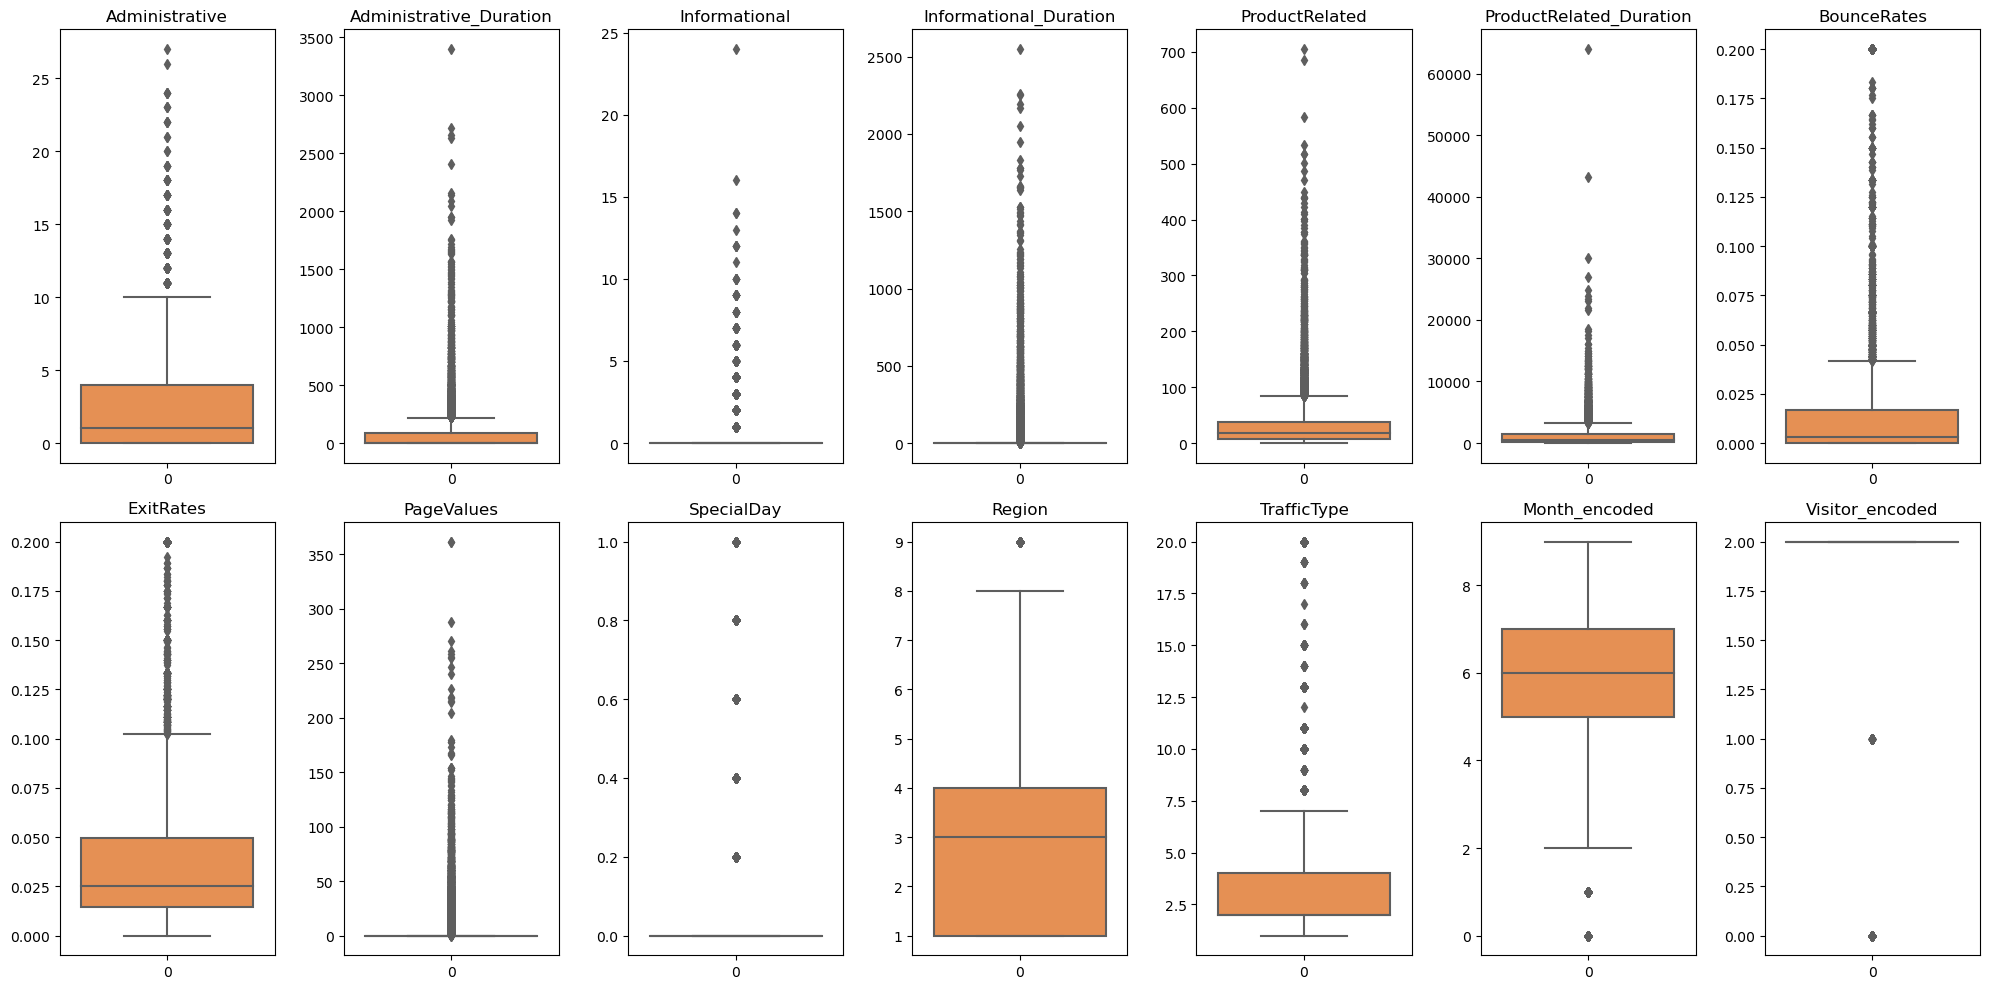

In [20]:
list_num = df_ecom2.select_dtypes(exclude=['object', 'bool'])
list_temp = list_num.columns

fig, axs = plt.subplots(2, 7, figsize=(20, 10))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Plot something in each subplot
for i in range(len(list_temp)):
    sns.boxplot(df_ecom2[list_temp[i]], palette='Oranges', orient='v', ax=axs[i])
    axs[i].set_title(f"{list_temp[i]}")

plt.tight_layout()
plt.show()

#### Notes:
1. All of the features analyzed shows the heavy presence of outliers, this would suggest the need of transformation in order to avoid bias in further analysis.
2. 4 particular features such as informational, informational_duration, pagevalues, and specialday are extremely concetrated towards one side, indicating a pronounced imbalance in the distribution of values.

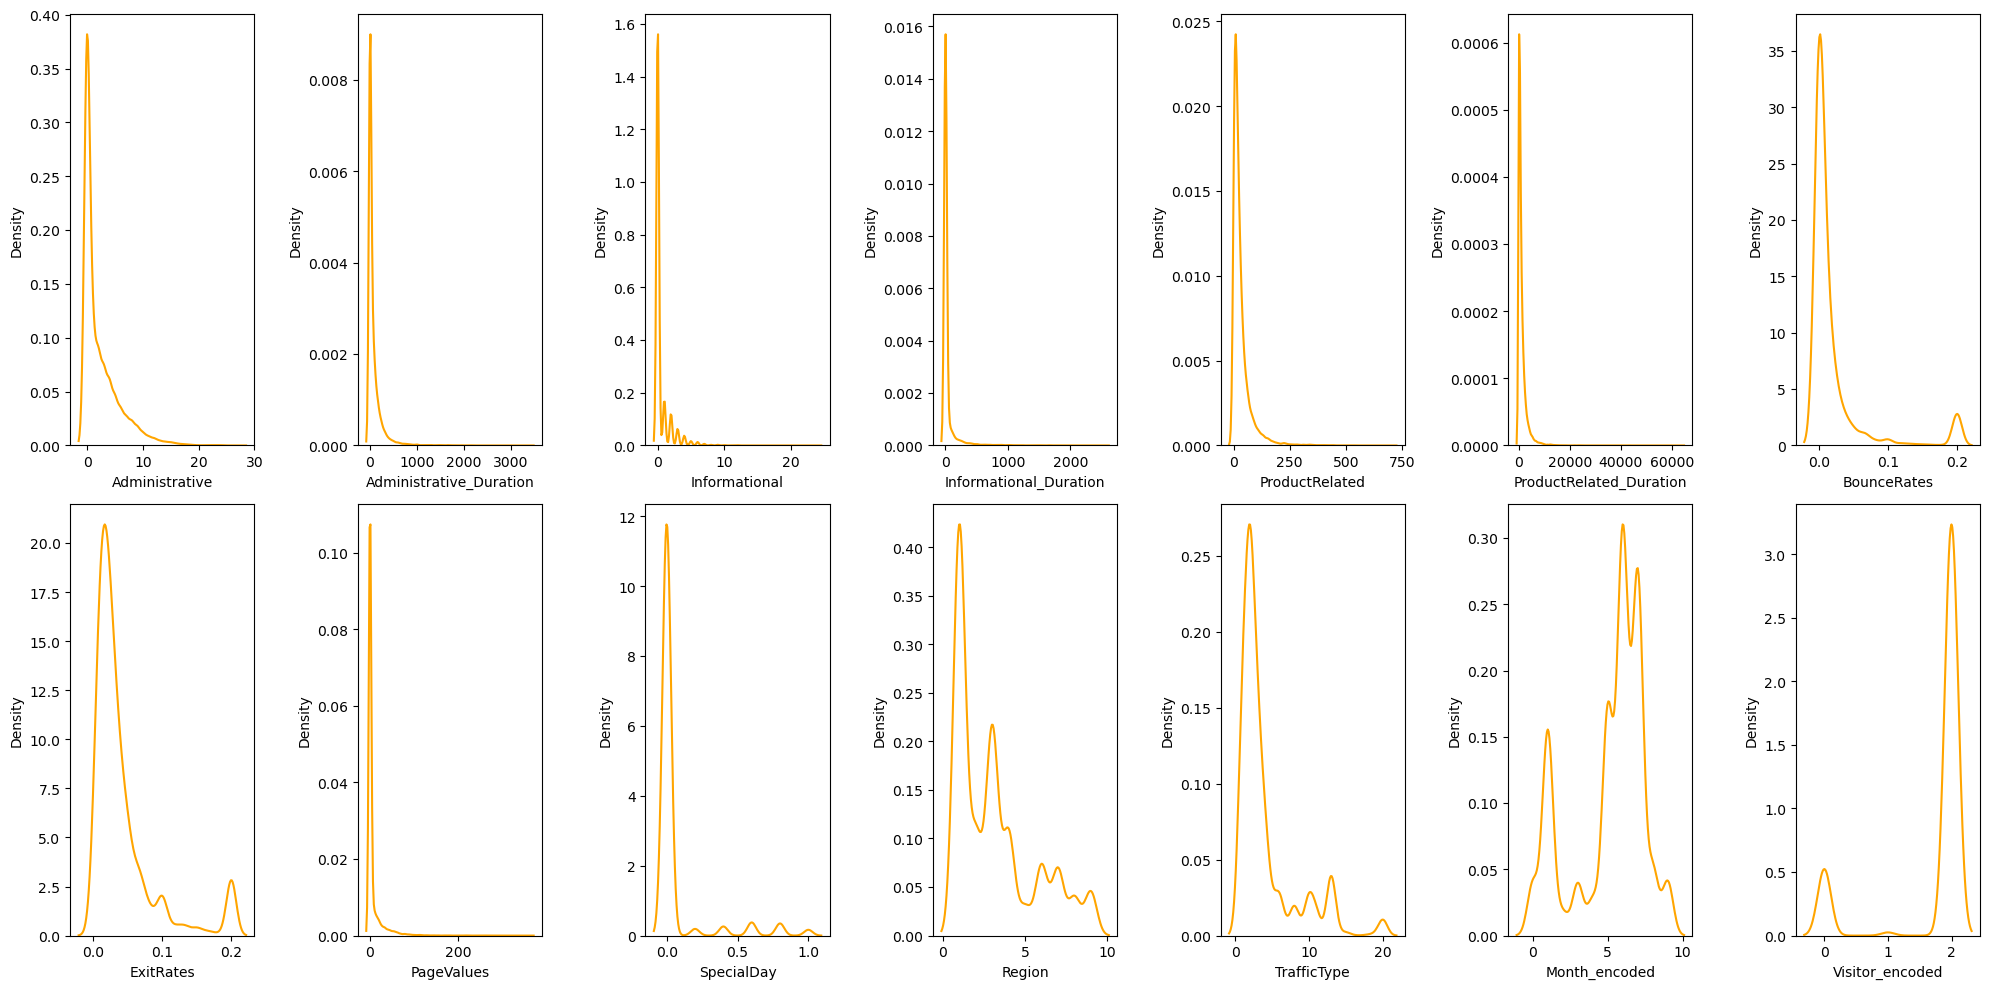

In [21]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

axs = axs.flatten()

for i in range(len(list_temp)):
    sns.kdeplot(df_ecom2[list_temp[i]], color='orange', ax=axs[i])

plt.tight_layout()
plt.show()

#### Notes:
1. Majority of the analyzed features (71%) in the dataset exhibit positive skew with presence of outliers.
2. Positively skewed distribution would suggest the need of transformation using method such as min-max or log, this is necessary considering the majority of features contain outliers that could possibly lead to bias.
3. 4 of the analyzed features could possibly have a bimodal distribution, this would indicate the presence of two distinct population with high amount of density.

In [22]:
df_ecom2['Target'] = df_ecom2['Revenue'].apply(lambda x: 'Buyer' if x == True else 'Non-Buyer')

In [23]:
df_ecom2['Target'].unique()

array(['Non-Buyer', 'Buyer'], dtype=object)

In [24]:
df_target_grp = df_ecom2.groupby(['Target']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=True)
df_target_grp.reset_index(inplace=True)

df_target_grp['Percentage'] = round(df_target_grp['vist_cnt']/df_target_grp['vist_cnt'].sum()*100,2)
df_target_grp

,Target,vist_cnt,Percentage
0,Buyer,1908,15.59
1,Non-Buyer,10327,84.41


Text(0, 0.5, 'Percentage by Total Clients')

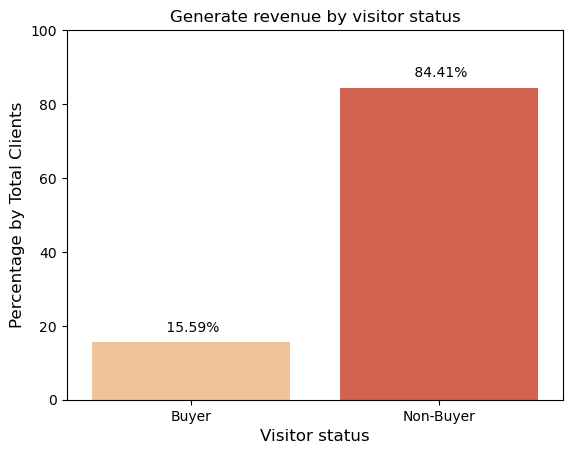

In [25]:
# Create barplot for Target
ax_diff = sns.barplot(x='Target', y='Percentage', data=df_target_grp, palette='OrRd')

pt.get_text(ax_diff,2,4)

# Formatting plot
plt.ylim(0, 100)

plt.title('Generate revenue by visitor status')
plt.xlabel('Visitor status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

## INSIGHT:
1. Visitor who are non-buyer are considerably much higher in percentages reaching 84.41% than those who are buyer. This would indicate that the company, as an ecommerce platform provider, might be lacking the means to convert visitors intention to buy a product. This could include factors such as prices, marketing, and user experience.
2. 15.59% of visitor are buyer, this indicates that the company needs to study the characteristics of the kind of visitor that visite the platform more deeply so that the company can identify which visitor are more likely to buy product and implement mitigation plan for the loss of potential buyer.

In [26]:
df_ecom2['Weekend_status'] = df_ecom2['Weekend'].apply(lambda x: 'Week-end' if x == True else 'Week-day')

In [27]:
df_ecom2['Weekend_status'].unique()

array(['Week-day', 'Week-end'], dtype=object)

In [28]:
df_weekstat_grp = df_ecom2.groupby(['Weekend_status', 'Target']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_weekstat_grp.reset_index(inplace=True)

df_weekstat_grp['Percentage'] = round(df_weekstat_grp['vist_cnt']/df_weekstat_grp['vist_cnt'].sum()*100,2)
df_weekstat_grp

,Weekend_status,Target,vist_cnt,Percentage
0,Week-day,Non-Buyer,7963,65.08
1,Week-end,Non-Buyer,2364,19.32
2,Week-day,Buyer,1409,11.52
3,Week-end,Buyer,499,4.08


Text(0, 0.5, 'Percentage by Total Clients')

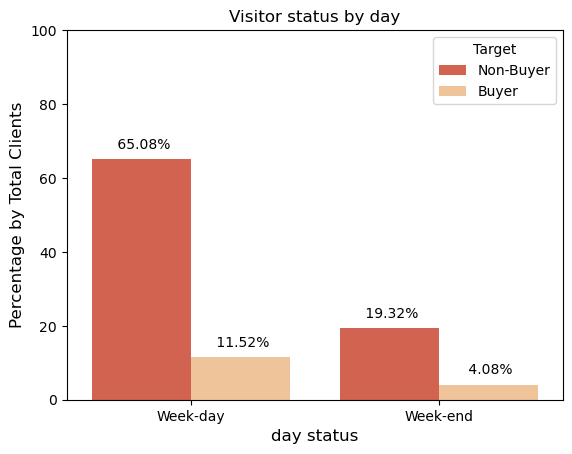

In [29]:
# Create barplot for Target
ax_weekstat = sns.barplot(x='Weekend_status', y='Percentage',hue='Target', data=df_weekstat_grp, palette='OrRd_r')

pt.get_text(ax_weekstat,2,4)

# Formatting plot
plt.ylim(0, 100)

plt.title('Visitor status by day')
plt.xlabel('day status',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

## INSIGHT:
1. Analysis shown that visitor tend to visit on week day with 65.08% being non-buyer, while buyer only having 11.52%. This indicates the impact of visitors daily pattern would affect their overall online activity, and could suggest that the platform's customer base tend to do online shopping on business day and are less likely to do it on week-end which are considered to be leisure days.
2. This finding are inline with research done by SaleCycle.com which stated that week day are the busiest retail day for online sales, while week-end particularly saturday being the worst day of the week for online sales.

In [30]:
for index, row in df_ecom2.iterrows():
    if row['SpecialDay'] <=0.2:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Close'
    elif row['SpecialDay'] <=0.4:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Moderate'
    elif row['SpecialDay'] <=1:
        df_ecom2.at[index, 'SpecialD_Category'] = 'Far'

In [31]:
df_speciald_grp = df_ecom2.groupby(['Target', 'SpecialD_Category']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_speciald_grp.reset_index(inplace=True)

df_speciald_grp['Percentage'] = round(df_speciald_grp['vist_cnt']/df_speciald_grp['vist_cnt'].sum()*100,2)
df_speciald_grp

,Target,SpecialD_Category,vist_cnt,Percentage
0,Non-Buyer,Close,9318,76.16
1,Buyer,Close,1845,15.08
2,Non-Buyer,Far,779,6.37
3,Non-Buyer,Moderate,230,1.88
4,Buyer,Far,50,0.41
5,Buyer,Moderate,13,0.11


Text(0, 0.5, 'Percentage of visitors')

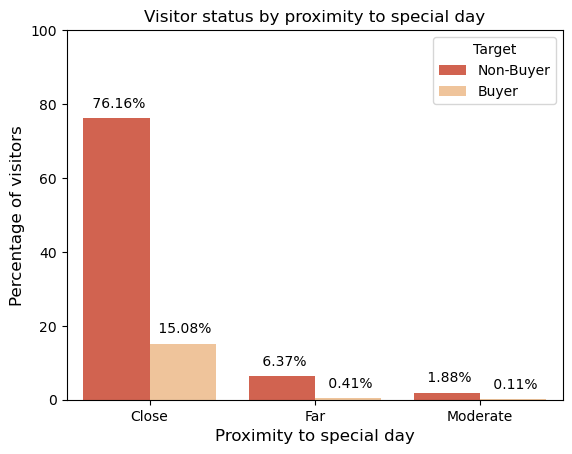

In [32]:
# Create barplot for Target
ax_spec_diff = sns.barplot(x='SpecialD_Category', y='Percentage',hue='Target', data=df_speciald_grp, palette='OrRd_r', )

pt.get_text(ax_spec_diff,2,4)

# Formatting plot
plt.ylim(0, 100)

plt.title('Visitor status by proximity to special day')
plt.xlabel('Proximity to special day',fontsize=12)
plt.ylabel('Percentage of visitors',fontsize=12)

## INSIGHT:
1. Majority of visitors visit the ecommerce platform when it's close to a special day, with visitor that are non-buyer reaching 76.16% of total visitor, while visitor who are buyer only having 15.08%. This could indicate that while visitors are attracted to possible upcoming events, those who are making purchases are more likely to be those who are familiar with the platform and thus more inclined to return for purchases if a similar event recurs.
2. There is a difference of more than 14% in the percentages of buyers when the special day is close compared to when it's far or moderate. This suggests that visitors are aware of upcoming events and might be waiting for special offers before visiting the platform, resulting in lower traffic and buyers during non-peak times.

** notes: total brp, avg, per cat

In [33]:
df_vistype_grp = df_ecom2.groupby(['Target', 'VisitorType']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_vistype_grp.reset_index(inplace=True)

df_vistype_grp['Percentage'] = round(df_vistype_grp['vist_cnt']/df_vistype_grp['vist_cnt'].sum()*100,2)
df_vistype_grp

,Target,VisitorType,vist_cnt,Percentage
0,Non-Buyer,Returning_Visitor,8991,73.49
1,Buyer,Returning_Visitor,1470,12.01
2,Non-Buyer,New_Visitor,1271,10.39
3,Buyer,New_Visitor,422,3.45
4,Non-Buyer,Other,65,0.53
5,Buyer,Other,16,0.13


Text(0, 0.5, 'Percentage by Total Clients')

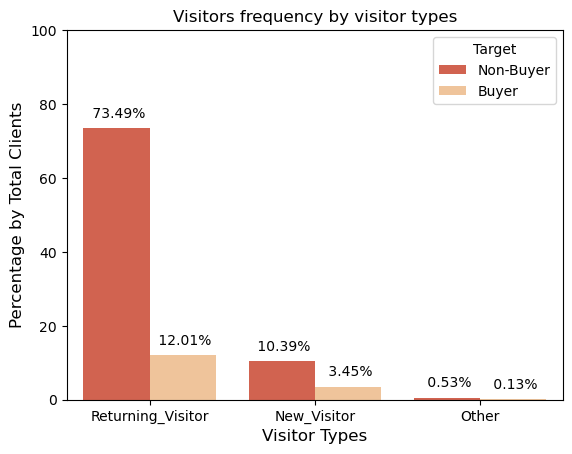

In [34]:
# Create barplot for Target
ax_vistype_diff = sns.barplot(x='VisitorType', y='Percentage',hue='Target', data=df_vistype_grp, palette='OrRd_r', )

pt.get_text(ax_vistype_diff,2,4)

# Formatting plot
plt.ylim(0, 100)
plt.title('Visitors frequency by visitor types')
plt.xlabel('Visitor Types',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

## INSIGHT:
1. Returning visitor make up the majority of visitor of the platform, with 73.49% of them as non-buyer and 12.01% as buyer. This indicate that returning visitor are more likely to make repeated purchase, this also suggest that the visitor purchasing ability are affected by the percieved benefit of ongoing or upcoming promotional program of the platform.
2. The second-highest percentage of visitors consists of those who are accessing the platform for the first time, with 10.39% being non-buyers and 3.45% being buyers. This would indicate that the ongoing marketing campaign by the platform is attracting new visitors and potential buyers, ensuring an influx of new visitors.
3. The reason the majority of the platform's visitors are returning visitors is that those who are already familiar with the platform and are satisfied with the provided benefits of using it compared to competitors, according to (Susanto, 2013) factor such as promotions that could benefit the customer can strongly determines the customer loyalty and intention. This indicates that the platform has succeeded in creating brand loyalty among its customers.

In [73]:
df_ecom2['ProductRelated'].describe()

count    12235.000000
mean        31.969677
std         44.565288
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

In [35]:
# to be analyze
df_ecom2['ProductRelated'].max()

705

In [39]:
# to be analyze - continued
df_ecom2['ProductRelated_Duration_minutes'] = df_ecom2['ProductRelated_Duration']/60

In [89]:
Q1 = df_ecom2['ProductRelated_Duration_minutes'].quantile(0.25)
Q3 = df_ecom2['ProductRelated_Duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
outlier = (Q3 + 1.5 * IQR)
print(f'Values are considered outlier if more than: {outlier:.2f}')

Values are considered outlier if more than: 55.26


In [81]:
for index, row in df_ecom2.iterrows():
    if row['ProductRelated_Duration_minutes'] <=5:
        df_ecom2.at[index, 'ProductD_category'] = 'Short'
    elif row['ProductRelated_Duration_minutes'] <=15:
        df_ecom2.at[index, 'ProductD_category'] = 'Medium'
    elif row['ProductRelated_Duration_minutes'] <=outlier:
        df_ecom2.at[index, 'ProductD_category'] = 'Long'
    else:
        df_ecom2.at[index, 'ProductD_category'] = 'Other'

In [83]:
df_productD_grp = df_ecom2.groupby(['Target', 'ProductD_category']).agg(vist_cnt = ('Target', 'count')).sort_values('vist_cnt', ascending=False)
df_productD_grp.reset_index(inplace=True)

df_productD_grp['Percentage'] = round(df_productD_grp['vist_cnt']/df_productD_grp['vist_cnt'].sum()*100,2)
df_productD_grp

,Target,ProductD_category,vist_cnt,Percentage
0,Non-Buyer,Short,4168,34.07
1,Non-Buyer,Long,2801,22.89
2,Non-Buyer,Medium,2692,22.00
3,Buyer,Long,759,6.20
4,Non-Buyer,Other,666,5.44
5,Buyer,Medium,568,4.64
6,Buyer,Short,298,2.44
7,Buyer,Other,283,2.31


Text(0, 0.5, 'Percentage by Total Clients')

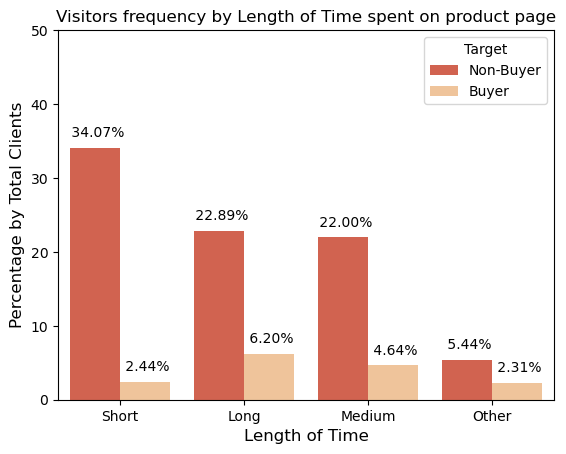

In [93]:
# Create barplot for Target
ax_productD_diff = sns.barplot(x='ProductD_category', y='Percentage',hue='Target', data=df_productD_grp, palette='OrRd_r', )

pt.get_text(ax_productD_diff,2,2)

# Formatting plot
plt.ylim(0, 50)
plt.title('Visitors frequency by Length of Time spent on product page')
plt.xlabel('Length of Time',fontsize=12)
plt.ylabel('Percentage by Total Clients',fontsize=12)

## INSIGHT:
1. Visitor who spent a short amount of time (up to 5 minutes) to browse has the highest percentages of non-buyer traffic reaching 34.07% of visitor, but has the second lowest percentages of buyer with only 2.44% of visitor.
2. 22.89% of visitor spent a long amount of time (>15 minutes) to browse and are the second highest traffic, with 6.2% of the visitor are buyer. Being the second highest traffic with the highest percentages of buyer would mean that visitors who spend a longer time browsing products are more likely to make a purchase compared to those who spend a shorter time. This indicates that the level of engagement and interest in the products plays a significant role in the decision to purchase.
3. 22% of visitors spent a medium amount of time (5-15 minutes) browsing product pages and are in third place in terms of traffic, with only a 0.89% margin of non-buyers compared to the second place, where 4.64% of visitors are buyers. This indicates that there is little difference in visitor purchasing behavior, and it is likely affected by the visitors' initial intentions, such as exploring and comparing products.
4. Visitors who spent an unusual amount of time (>55 minutes) browsing product pages have the lowest amount of traffic and are uncommon compared to other time lengths, with only 5.44% being non-buyers and 2.31% being buyers. This unusually long browsing time could be due to a genuine interest in particular products and the visitor behavior in comparing them with other products.
5. Visitors who spent a long or medium amount of time browsing product pages showed similar percentages for both non-buyers and buyers. This suggests that conversions are more likely among visitors who spent 5-15 minutes or more than 15 minutes browsing. Conversely, conversions are less likely among visitors who browse for a short amount of time or an unusually long amount of time.

In [45]:
# to be moved
df_ecom2['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [46]:
month_map = {
    'feb': 'February', 'mar': 'March', 'may': 'May', 
    'june': 'June', 'jul': 'July', 'aug': 'August',
    'sep': 'September', 'oct': 'October', 'nov': 'November', 'dec': 'December'
}

# Convert string to datetime
for index, row in df_ecom2.iterrows():
    df_ecom2.at[index, 'Month'] = month_map.get(row['Month'].lower(), row['Month'])

In [47]:
year = 2023
df_ecom2['Month_converted'] = pd.to_datetime(df_ecom2['Month'] + ' ' + str(year), format='%B %Y')

In [48]:
temp_list_month = df_ecom2['Month_converted'].unique()
temp_list_month.tolist()

temp_list_month

<DatetimeArray>
['2023-02-01 00:00:00', '2023-03-01 00:00:00', '2023-05-01 00:00:00',
 '2023-10-01 00:00:00', '2023-06-01 00:00:00', '2023-07-01 00:00:00',
 '2023-08-01 00:00:00', '2023-11-01 00:00:00', '2023-09-01 00:00:00',
 '2023-12-01 00:00:00']
Length: 10, dtype: datetime64[ns]

In [49]:
specific_date = pd.Timestamp('2024-01-01')

df_ecom2['Days_Difference'] = (specific_date - df_ecom2['Month_converted']).dt.days

In [50]:
df_ecom2['Days_Difference'].unique()

array([334, 306, 245,  92, 214, 184, 153,  61, 122,  31], dtype=int64)

In [51]:
df_ecom2.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue,Month_encoded,Visitor_encoded,Target,Weekend_status,SpecialD_Category,ProductRelated_Duration_minutes,Product_duration_range,Month_converted,Days_Difference
0,0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,February,1,1,Returning_Visitor,False,False,2,2,Non-Buyer,Week-day,Close,0.000000,NaN,2023-02-01,334
1,1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,February,1,2,Returning_Visitor,False,False,2,2,Non-Buyer,Week-day,Close,1.066667,NaN,2023-02-01,334
2,2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,February,9,3,Returning_Visitor,False,False,2,2,Non-Buyer,Week-day,Close,0.000000,NaN,2023-02-01,334
3,3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,February,2,4,Returning_Visitor,False,False,2,2,Non-Buyer,Week-day,Close,0.044444,"(0.0, 3.0]",2023-02-01,334
4,4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,February,1,4,Returning_Visitor,True,False,2,2,Non-Buyer,Week-end,Close,10.458333,NaN,2023-02-01,334


## Multivariate Analysis

In [52]:
df_ecom3['Weekend_encoded'] = label_encoder.fit_transform(df_ecom3['Weekend'])
df_ecom3['Revenue_encoded'] = label_encoder.fit_transform(df_ecom3['Revenue'])

col_num = df_ecom3.select_dtypes(exclude=['object', 'bool'])
list_col_num = col_num.columns

<Axes: >

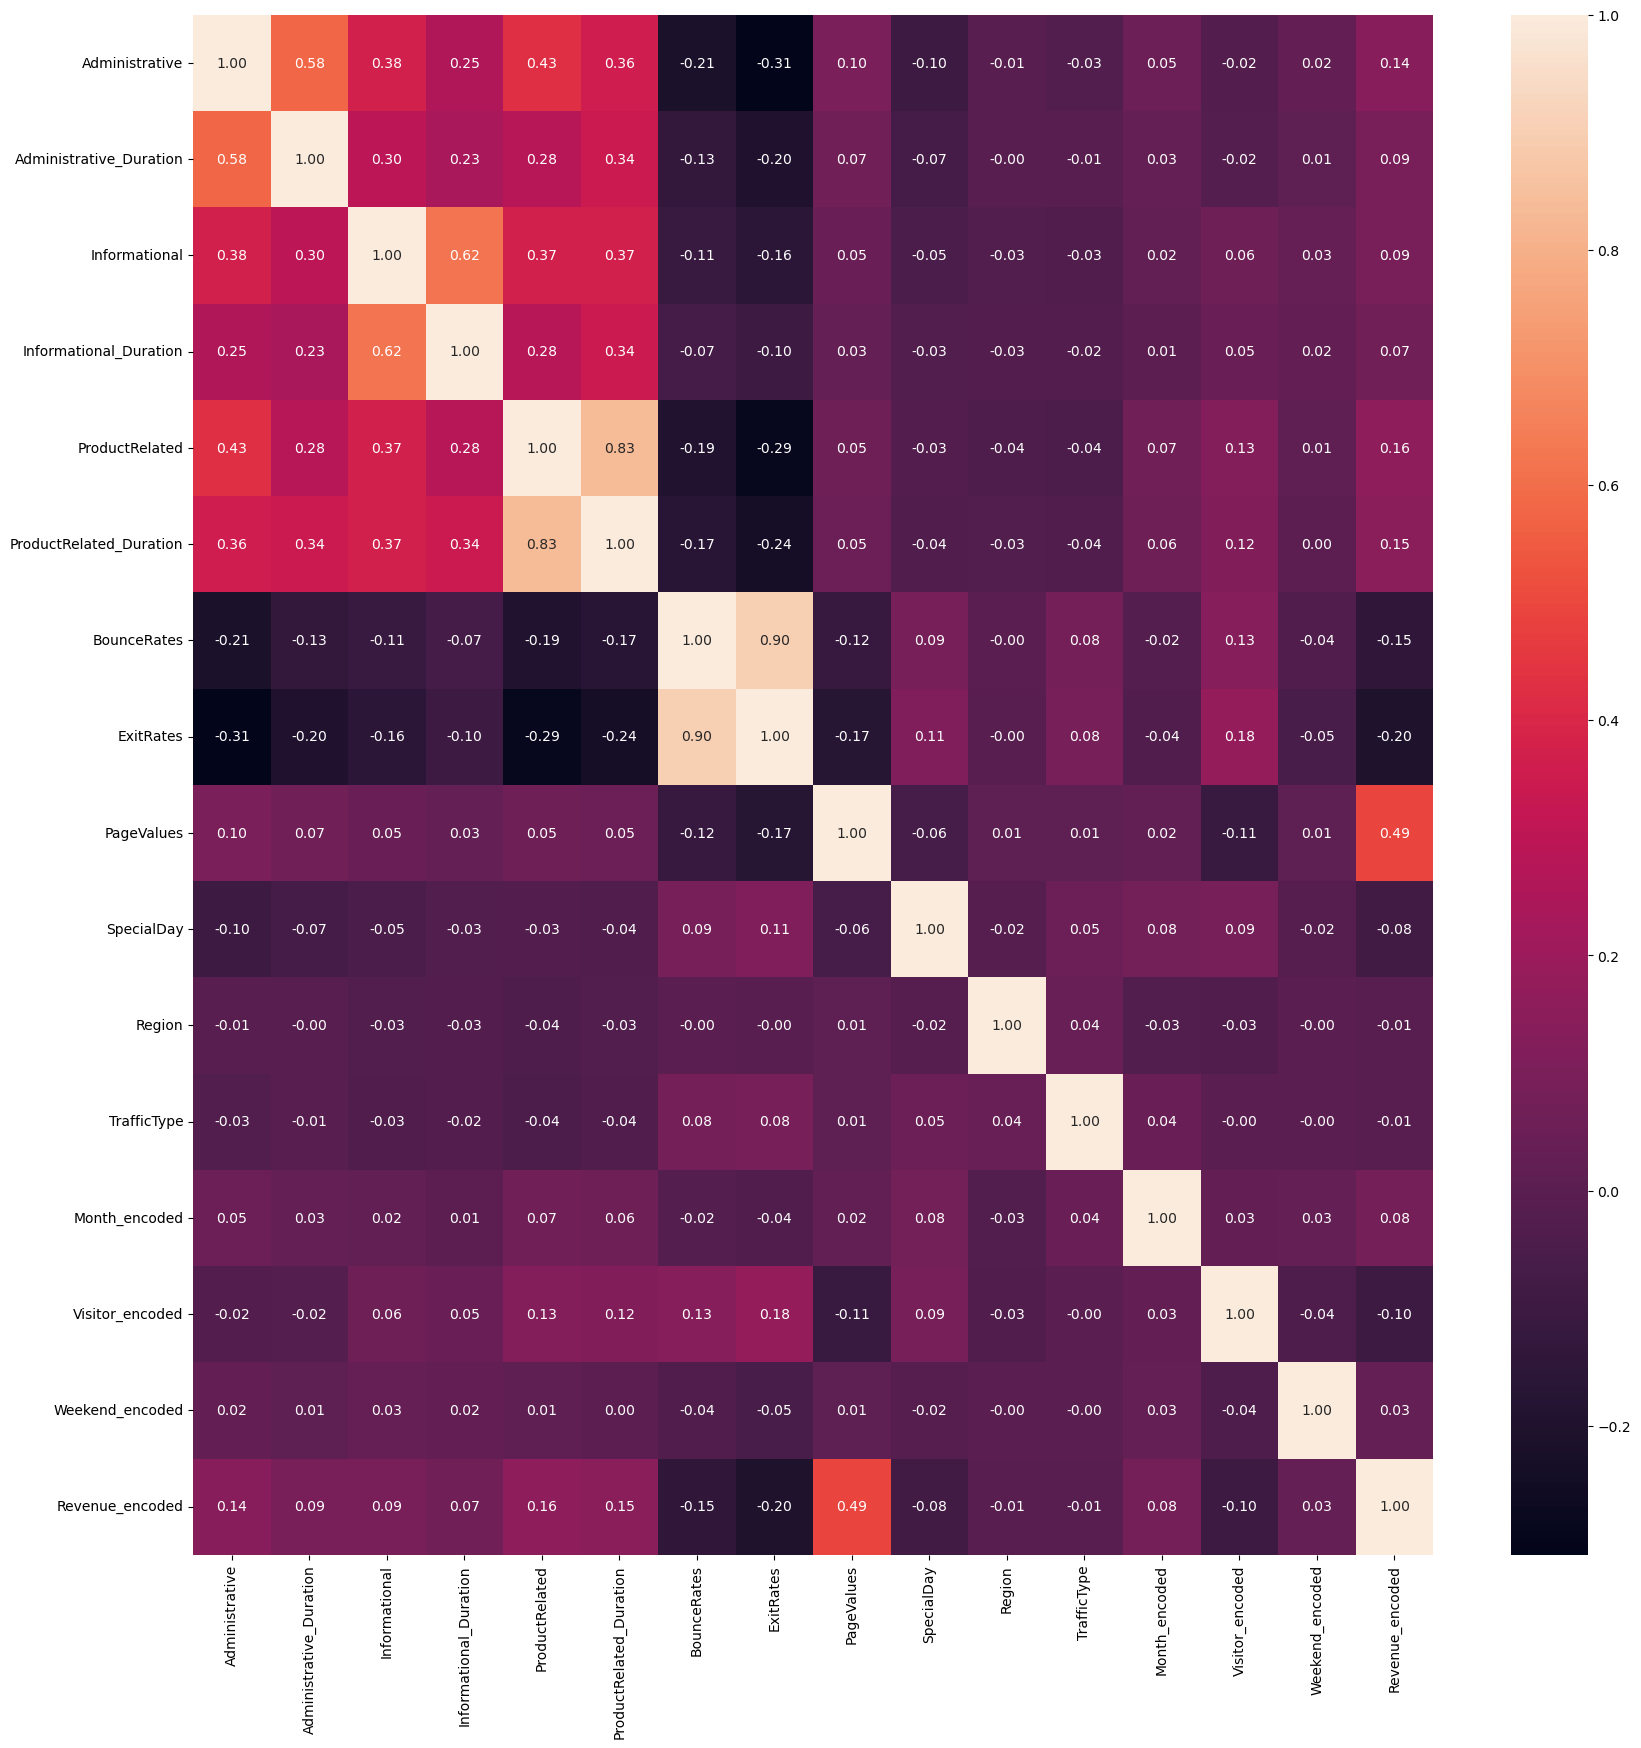

In [53]:
plt.figure(figsize=(20,20))
corr = df_ecom3[list_col_num].corr()

sns.heatmap(corr, annot=True, fmt='.2f')

## Notes: Copied
1. Majority of visitors visit the ecommerce platform when it's close to a special day, with visitor that are non-buyer having 76.16%, while visitor who are buyer only having 15.08%. This could indicate that while visitors are attracted to possible upcoming events, those who are making purchases are more likely to be those who are familiar with the platform and thus more inclined to return for purchases if a similar event recurs.
2. There is a difference of more than 14% in the percentages of buyers when the special day is close compared to when it's far or moderate. This suggests that visitors are aware of upcoming events and might be waiting for special offers before visiting the platform, resulting in lower traffic and buyers during non-peak times.

## INSIGHT: Copied
1. Majority of visitors visit the ecommerce platform when it's close to a special day, with visitor that are non-buyer having 76.16%, while visitor who are buyer only having 15.08%. This could indicate that while visitors are attracted to possible upcoming events, those who are making purchases are more likely to be those who are familiar with the platform and thus more inclined to return for purchases if a similar event recurs.
2. There is a difference of more than 14% in the percentages of buyers when the special day is close compared to when it's far or moderate. This suggests that visitors are aware of upcoming events and might be waiting for special offers before visiting the platform, resulting in lower traffic and buyers during non-peak times.